# Exploratory Data Analysis

Analisa data eksploratif oleh Robby Rodhiyya

---

Dari data yang disediakan pada file **Data Analyst Case Study**, akan dilakukan analisis untuk melihat informasi berupa:

1. Statistik deskriptif peserta Program Kartu Prakerja
2. Analisis perbandingan kelompok
3. Analisis korelasi
4. Analisis regresi

---

Adapun tahapan yang dilakukan yaitu:
1. Data Collecting
2. Data Cleansing
3. Data Analysis
4. Data Modeling
4. Data Visualization

---

## Data Collecting

In [280]:
# import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [281]:
# baca data csv sebagai dataframe dan cek 5 baris teratas 

url = 'https://drive.google.com/file/d/1sGfThM5pOT_D0ZkjTIu6RHWeoPkKixYT/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)

df.head()

,ID,Grup Umur,Penghasilan per Bulan,Provinsi,Jumlah Pelatihan Diselesaikan,Skor Kemampuan Dasar,Bidang Pelatihan Terakhir,Skor Penilaian Pra Pelatihan Terakhir,Skor Penilaian Pasca Pelatihan Terakhir
0,1,18-25,Dibawah Rp 1 Juta,B,1,46,Bahasa,26,31
1,2,18-25,Rp 1-3.5 Juta,A,2,19,Bisnis,5,7
2,3,Diatas 45,Dibawah Rp 1 Juta,A,1,23,Bisnis,3,33
3,4,Diatas 45,Rp 1-3.5 Juta,C,3,48,Bisnis,28,46
4,5,Diatas 45,Dibawah Rp 1 Juta,B,1,48,Bisnis,28,38


In [282]:
# cek info dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   ID                                       200 non-null    int64 
 1   Grup Umur                                200 non-null    object
 2   Penghasilan per Bulan                    200 non-null    object
 3   Provinsi                                 200 non-null    object
 4   Jumlah Pelatihan Diselesaikan            200 non-null    int64 
 5   Skor Kemampuan Dasar                     200 non-null    int64 
 6   Bidang Pelatihan  Terakhir               200 non-null    object
 7   Skor Penilaian Pra Pelatihan Terakhir    200 non-null    int64 
 8   Skor Penilaian Pasca Pelatihan Terakhir  200 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 14.2+ KB


---

## Data Cleansing

In [283]:
# cek kolom null

df.isnull().sum()

ID                                         0
Grup Umur                                  0
Penghasilan per Bulan                      0
Provinsi                                   0
Jumlah Pelatihan Diselesaikan              0
Skor Kemampuan Dasar                       0
Bidang Pelatihan  Terakhir                 0
Skor Penilaian Pra Pelatihan Terakhir      0
Skor Penilaian Pasca Pelatihan Terakhir    0
dtype: int64

In [284]:
# perubahan pada nama kolom

df = df.rename(columns={
    'ID': 'id',
    'Grup Umur': 'grup_umur',
    'Penghasilan per Bulan': 'penghasilan_per_bulan',
    'Provinsi': 'provinsi',
    'Jumlah Pelatihan Diselesaikan': 'jumlah_pelatihan_selesai',
    'Skor Kemampuan Dasar': 'skor_kemampuan_dasar',
    'Bidang Pelatihan  Terakhir': 'bidang_pelatihan',
    'Skor Penilaian Pra Pelatihan Terakhir': 'skor_penilaian_pra',
    'Skor Penilaian Pasca Pelatihan Terakhir': 'skor_penilaian_pasca'
})

In [285]:
# penambahan kolom data untuk memudahkan analisa deskriptif

df['data'] = 1
df.head()

,id,grup_umur,penghasilan_per_bulan,provinsi,jumlah_pelatihan_selesai,skor_kemampuan_dasar,bidang_pelatihan,skor_penilaian_pra,skor_penilaian_pasca,data
0,1,18-25,Dibawah Rp 1 Juta,B,1,46,Bahasa,26,31,1
1,2,18-25,Rp 1-3.5 Juta,A,2,19,Bisnis,5,7,1
2,3,Diatas 45,Dibawah Rp 1 Juta,A,1,23,Bisnis,3,33,1
3,4,Diatas 45,Rp 1-3.5 Juta,C,3,48,Bisnis,28,46,1
4,5,Diatas 45,Dibawah Rp 1 Juta,B,1,48,Bisnis,28,38,1


---

 ## Data Analysis

#### 1. Statistik deskriptif peserta Program Kartu Prakerja

In [286]:
# distribusi peserta berdasarkan umur

distribusi_umur = df[['data', 'grup_umur']].groupby('grup_umur', as_index=False).count().rename(columns={'data': 'total'})
distribusi_umur

,grup_umur,total
0,18-25,55
1,26-45,109
2,Diatas 45,36


In [287]:
# distribusi peserta berdasarkan penghasilan

distribusi_penghasilan = df[['data', 'penghasilan_per_bulan']].groupby('penghasilan_per_bulan', as_index=False).count().rename(columns={'data': 'total'})
distribusi_penghasilan

,penghasilan_per_bulan,total
0,Diatas Rp 3.5 Juta,56
1,Dibawah Rp 1 Juta,37
2,Rp 1-3.5 Juta,107


In [288]:
# distribusi peserta berdasarkan provinsi

distribusi_provinsi = df[['data', 'provinsi']].groupby('provinsi', as_index=False).count().rename(columns={'data': 'total'})
distribusi_provinsi

,provinsi,total
0,A,70
1,B,67
2,C,63


In [289]:
# distribusi peserta berdasarkan bidang pelatihan

distribusi_minat = df[['data', 'bidang_pelatihan']].groupby('bidang_pelatihan', as_index=False).count().rename(columns={'data': 'total'})
distribusi_minat

,bidang_pelatihan,total
0,Bahasa,70
1,Bisnis,72
2,IT & Data,58


In [290]:
# jumlah & rata-rata pelatihan selesai per umur

selesai_per_umur = df[['grup_umur', 'jumlah_pelatihan_selesai']].groupby('grup_umur', as_index=False).agg(total=('jumlah_pelatihan_selesai', 'sum'), avg=('jumlah_pelatihan_selesai', 'mean')).rename(columns={'total': 'jumlah_pelatihan_selesai','avg': 'avg_pelatihan_selesai'})
selesai_per_umur

,grup_umur,jumlah_pelatihan_selesai,avg_pelatihan_selesai
0,18-25,89,1.618182
1,26-45,214,1.963303
2,Diatas 45,48,1.333333


In [291]:
# jumlah & rata-rata pelatihan selesai per bidang pelatihan

selesai_per_bidang = df[['bidang_pelatihan', 'jumlah_pelatihan_selesai']].groupby('bidang_pelatihan', as_index=False).agg(total=('jumlah_pelatihan_selesai', 'sum'), avg=('jumlah_pelatihan_selesai', 'mean')).rename(columns={'total': 'jumlah_pelatihan_selesai','avg': 'avg_pelatihan_selesai'})
selesai_per_bidang

,bidang_pelatihan,jumlah_pelatihan_selesai,avg_pelatihan_selesai
0,Bahasa,125,1.785714
1,Bisnis,121,1.680556
2,IT & Data,105,1.810345


---

#### 2. Analisis perbandingan kelompok

In [292]:
# peminatan bidang pelatihan berdasarkan provinsi

peminatan_provinsi = df[['data', 'provinsi', 'bidang_pelatihan']].groupby(['provinsi', 'bidang_pelatihan'], as_index=False).count().rename(columns={'data': 'total'})
peminatan_provinsi

,provinsi,bidang_pelatihan,total
0,A,Bahasa,22
1,A,Bisnis,26
2,A,IT & Data,22
3,B,Bahasa,25
4,B,Bisnis,26
5,B,IT & Data,16
6,C,Bahasa,23
7,C,Bisnis,20
8,C,IT & Data,20


In [293]:
# peminatan bidang pelatihan berdasarkan umur

peminatan_umur = df[['data', 'grup_umur', 'bidang_pelatihan']].groupby(['grup_umur', 'bidang_pelatihan'], as_index=False).count().rename(columns={'data': 'total'})
peminatan_umur

,grup_umur,bidang_pelatihan,total
0,18-25,Bahasa,24
1,18-25,Bisnis,15
2,18-25,IT & Data,16
3,26-45,Bahasa,35
4,26-45,Bisnis,38
5,26-45,IT & Data,36
6,Diatas 45,Bahasa,11
7,Diatas 45,Bisnis,19
8,Diatas 45,IT & Data,6


In [294]:
# penghapusan kolom data

del df['data']

---

#### 3. Analisis korelasi

In [295]:
# penambahan kolom grade_umur dan grade_penghasilan untuk analisa korelasi

df['grade_umur'] = 0
df['grade_umur'][df['grup_umur'] == '18-25'] = 3
df['grade_umur'][df['grup_umur'] == '26-45'] = 2
df['grade_umur'][df['grup_umur'] == 'Diatas 45'] = 1

df['grade_penghasilan'] = 0
df['grade_penghasilan'][df['penghasilan_per_bulan'] == 'Dibawah Rp 1 Juta'] = 3
df['grade_penghasilan'][df['penghasilan_per_bulan'] == 'Rp 1-3.5 Juta'] = 2
df['grade_penghasilan'][df['penghasilan_per_bulan'] == 'Diatas Rp 3.5 Juta'] = 1

/tmp/ipykernel_12832/352051262.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grade_umur'][df['grup_umur'] == '18-25'] = 3
/tmp/ipykernel_12832/352051262.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grade_umur'][df['grup_umur'] == '26-45'] = 2
/tmp/ipykernel_12832/352051262.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grade_umur'][df['grup_umur'] == 'Diatas 45'] = 1
/tmp/ipykernel_12832/352051262.py:9: Se

In [296]:
# cek korelasi umum

df.corr()

,id,jumlah_pelatihan_selesai,skor_kemampuan_dasar,skor_penilaian_pra,skor_penilaian_pasca,grade_umur,grade_penghasilan
id,1.000000,0.073724,0.058729,0.044200,0.116853,0.030929,0.051365
jumlah_pelatihan_selesai,0.073724,1.000000,0.405381,0.365187,0.297892,0.075585,0.052194
skor_kemampuan_dasar,0.058729,0.405381,1.000000,0.943914,0.775695,0.091710,0.027961
skor_penilaian_pra,0.044200,0.365187,0.943914,1.000000,0.812935,0.118582,0.092466
skor_penilaian_pasca,0.116853,0.297892,0.775695,0.812935,1.000000,0.061250,0.076536
grade_umur,0.030929,0.075585,0.091710,0.118582,0.061250,1.000000,0.141979
grade_penghasilan,0.051365,0.052194,0.027961,0.092466,0.076536,0.141979,1.000000


---

## Data Modeling

#### 4. Analisis regresi

In [297]:
# membuat pemodelan untuk memprediksi skor_penilaian_pasca berdasarkan skor_penilaian_pra
# menggunakan analisis regresi sederhana

# pemodelan dengan data training
x_pra = df['skor_penilaian_pra']
X_pra = x_pra[:, np.newaxis]
y_pasca = df['skor_penilaian_pasca']

regressor = LinearRegression()
model = regressor.fit(X_pra, y_pasca)

/tmp/ipykernel_12832/3099684019.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_pra = x_pra[:, np.newaxis]


In [298]:
# cek nilai coeficient

regressor.coef_

array([1.00799766])

In [299]:
# cek nilai intercept

regressor.intercept_

13.131258040971247

---

## Data Visualization

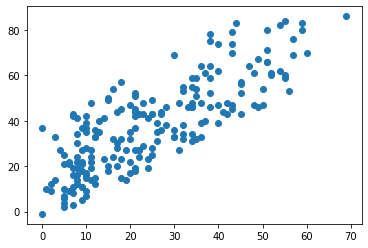

In [300]:
# persebaran korelasi data skor_penilaian_pasca terhadap skor_penilaian_pra
# divisualisasikan dengan scatter plot

plt.scatter(df['skor_penilaian_pra'], df['skor_penilaian_pasca'])

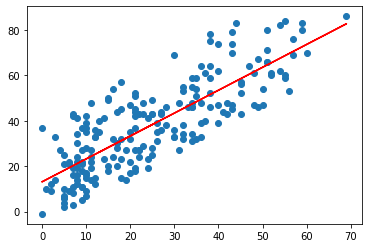

In [301]:
# scatter plot dengan penambahan garis prediksi hasil model analisis regresi

plt.scatter(X_pra, y_pasca)

y_pred = regressor.predict(X_pra)
plt.plot(X_pra, y_pred, color='red')

In [302]:
# cek nilai prediksi pada model

regressor.score(X_pra, y_pasca)

0.6608631691133463

In [308]:
# generate nilai random ~90

X_baru = np.random.randint(90, size=(1,1))
X_baru

array([[81]])

In [312]:
# tes prediksi dengan nilai random generate

y_pred = regressor.predict(X_baru)
y_pred

array([94.77906885])